<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.4: Sentiment Analysis
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A
- Number of Web Hits: 102584

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [1]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data.

Hint: Source is separated by <tab>s and has no headers.

In [2]:
yelp_text = 'yelp_labelled.txt'
imdb_text = 'imdb_labelled_fixed.txt'
amazon_text = 'amazon_cells_labelled.txt'

# ANSWER
amazon = pd.read_csv('D:\IOD Data\sentiment\sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', header=None)
yelp = pd.read_csv('D:\IOD Data\sentiment\sentiment labelled sentences/yelp_labelled.txt', sep='\t', header=None)
imdb = pd.read_csv('D:\IOD Data\sentiment\sentiment labelled sentences/imdb_labelled.txt', sep='\t', header=None)

## Inspect the data

Check your datasets.

In [3]:
# ANSWER
print(amazon.head())
print(yelp.head())
print(imdb.head())

                                                   0  1
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1
                                                   0  1
0                           Wow... Loved this place.  1
1                                 Crust is not good.  0
2          Not tasty and the texture was just nasty.  0
3  Stopped by during the late May bank holiday of...  1
4  The selection on the menu was great and so wer...  1
                                                   0  1
0  A very, very, very slow-moving, aimless movie ...  0
1  Not sure who was more lost - the flat characte...  0
2  Attempting artiness with black & white and cle...  0
3       Very little music or anything to speak of.    0
4  The best scene in the movie was when Gerardo 

## Merge the data

Merge all three datasets.

In [4]:
# ANSWER
frames = [amazon, yelp, imdb]
data = pd.concat(frames)

## Export the data

Export merged datasets to as csv file.

In [5]:
# ANSWER
data.to_csv(r'D:\IOD Data\sentiment\sentiment labelled sentences\Merged_data.csv', index = False)


## Prepare the stage
- Load spaCy

In [6]:
nlp = spacy.load('en_core_web_sm')

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international charaters
- handle simbols
- handle metadata and embeded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [7]:
data.columns
data = data.rename(columns={0: "Text", 1: "Sentiment"})

In [8]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)
    #text = text.lower()
    return text
data['Text'] = data['Text'].apply(lambda x : clean_text(x))

In [9]:
# ANSWER
print(data.head())

                                                Text  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1


## Work the text
Concern with the meaning and the substance of the content to extract actual information.

Hint: Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.

In [10]:

def stopsen(text):
    doc = nlp(text)
    for token in doc:
        print(token.text, token.lemma_, token.pos_, token.is_stop)
    return text

data['Text'] = data['Text'].apply(lambda x : stopsen(x))

So so ADV True
there there PRON True
is be AUX True
no no DET True
way way NOUN False
for for ADP True
me I PRON True
to to PART True
plug plug VERB False
it it PRON True
in in ADP True
here here ADV True
in in ADP True
the the DET True
US US PROPN True
unless unless SCONJ True
I I PRON True
go go VERB True
by by ADP True
a a DET True
converter converter NOUN False
. . PUNCT False
Good good ADJ False
case case NOUN False
, , PUNCT False
Excellent excellent ADJ False
value value NOUN False
. . PUNCT False
Great great ADJ False
for for ADP True
the the DET True
jawbone jawbone NOUN False
. . PUNCT False
Tied tie VERB False
to to AUX True
charger charger VERB False
for for ADP True
conversations conversation NOUN False
lasting last VERB False
more more ADJ True
than than SCONJ True
45 45 NUM False
minutes minute NOUN False
. . PUNCT False
MAJOR MAJOR PROPN False
PROBLEMS PROBLEMS PROPN False
! ! PUNCT False
! ! PUNCT False
The the DET True
mic mic ADJ False
is be AUX True
great great ADJ 

to to ADP True
your your PRON True
phone phone NOUN False
book book NOUN False
from from ADP True
the the DET True
time time NOUN False
you you PRON True
first first ADV True
turn turn VERB False
on on ADP True
the the DET True
phone phone NOUN False
. . PUNCT False
Battery battery NOUN False
life life NOUN False
is be AUX True
short short ADJ False
. . PUNCT False
It it PRON True
has have AUX True
kept keep VERB False
up up ADP True
very very ADV True
well well ADV True
. . PUNCT False
Poor Poor PROPN False
Talk Talk PROPN False
Time Time PROPN False
Performance Performance PROPN False
. . PUNCT False
The the DET True
case case NOUN False
is be AUX True
great great ADJ False
and and CCONJ True
works work VERB False
fine fine ADV False
with with ADP True
the the DET True
680 680 NUM False
. . PUNCT False
worthless worthless ADJ False
product product NOUN False
. . PUNCT False
It it PRON True
has have VERB True
a a DET True
great great ADJ False
camera camera NOUN False
that that DET Tr

Great great ADJ False
choice choice NOUN False
! ! PUNCT False
Nice nice ADJ False
docking docking NOUN False
station station NOUN False
for for ADP True
home home NOUN False
or or CCONJ True
work work NOUN False
. . PUNCT False
This this DET True
is be AUX True
a a DET True
beautiful beautiful ADJ False
phone phone NOUN False
. . PUNCT False
Love love VERB False
this this DET True
product product NOUN False
. . PUNCT False
Do do AUX True
Not not PART True
Buy buy VERB False
for for ADP True
D807 D807 NOUN False
... ... PUNCT False
wrongly wrongly ADV False
advertised advertise VERB False
for for ADP True
D807 D807 PROPN False
. . PUNCT False
This this DET True
is be AUX True
a a DET True
great great ADJ False
little little ADJ False
item item NOUN False
. . PUNCT False
I I PRON True
love love VERB False
this this DET True
phone phone NOUN False
, , PUNCT False
It it PRON True
is be AUX True
very very ADV True
handy handy ADJ False
and and CCONJ True
has have VERB True
a a DET True
lot

The the DET True
camera camera NOUN False
, , PUNCT False
although although SCONJ True
rated rate VERB False
at at ADP True
an an DET True
impressive impressive ADJ False
1.3 1.3 NUM False
megapixels megapixel NOUN False
, , PUNCT False
renders render VERB False
images image NOUN False
that that DET True
fall fall VERB False
well well ADV True
below below ADP True
expectations expectation NOUN False
of of ADP True
such such DET True
a a DET True
relatively relatively ADV False
high high ADJ False
resolution resolution NOUN False
. . PUNCT False
I I PRON True
purcashed purcashe VERB False
this this DET True
for for ADP True
the the DET True
car car NOUN False
charger charger NOUN False
and and CCONJ True
it it PRON True
does do AUX True
not not PART True
work work VERB False
. . PUNCT False
Sound sound ADJ False
quality quality NOUN False
on on ADP True
both both DET True
end end NOUN False
is be AUX True
excellent excellent ADJ False
, , PUNCT False
I I PRON True
use use VERB False
hea

This this DET True
item item NOUN False
is be AUX True
fantastic fantastic ADJ False
and and CCONJ True
works work VERB False
perfectly perfectly ADV False
! ! PUNCT False
And and CCONJ True
I I PRON True
just just ADV True
love love VERB False
the the DET True
colors color NOUN False
! ! PUNCT False
W810i W810i PROPN False
is be AUX True
just just ADV True
SUPERB superb NOUN False
. . PUNCT False
All all DET True
I I PRON True
can can AUX True
do do VERB True
is be AUX True
whine whine VERB False
on on ADP True
the the DET True
Internet internet NOUN False
, , PUNCT False
so so CCONJ True
here here ADV True
it it PRON True
goes go VERB False
. . PUNCT False
The the DET True
more more ADV True
I I PRON True
use use VERB False
the the DET True
thing thing NOUN False
the the DET True
less less ADV True
I I PRON True
like like VERB False
it it PRON True
. . PUNCT False
Great great ADJ False
charger charger NOUN False
. . PUNCT False
This this DET True
is be AUX True
essentially essentiall

bother bother VERB False
contacting contact VERB False
the the DET True
company company NOUN False
for for ADP True
few few ADJ True
dollar dollar NOUN False
product product NOUN False
but but CCONJ True
I I PRON True
learned learn VERB False
the the DET True
lesson lesson NOUN False
that that SCONJ True
I I PRON True
should should AUX True
not not PART True
have have AUX True
bought buy VERB False
this this DET True
form form NOUN False
online online ADV False
anyway anyway ADV True
. . PUNCT False
If if SCONJ True
you you PRON True
hate hate VERB False
earbugs earbug VERB False
, , PUNCT False
avoid avoid VERB False
this this DET True
phone phone NOUN False
by by ADP True
all all DET True
means mean NOUN False
. . PUNCT False
Great great ADJ False
price price NOUN False
also also ADV True
! ! PUNCT False
The the DET True
range range NOUN False
is be AUX True
very very ADV True
decent decent ADJ False
, , PUNCT False
I I PRON True
've 've AUX True
been be VERB True
able able ADJ False

price price NOUN False
and and CCONJ True
they they PRON True
work work VERB False
great great ADJ False
! ! PUNCT False
Internet internet NOUN False
is be AUX True
excrutiatingly excrutiatingly ADV False
slow slow ADJ False
. . PUNCT False
It it PRON True
is be AUX True
very very ADV True
comfortable comfortable ADJ False
to to PART True
wear wear VERB False
as as ADV True
well well ADV True
, , PUNCT False
which which DET True
is be AUX True
probably probably ADV False
the the DET True
most most ADV True
important important ADJ False
aspect aspect NOUN False
about about ADP True
using use VERB True
a a DET True
case case NOUN False
. . PUNCT False
It it PRON True
's be AUX True
fits fit VERB False
like like ADP False
a a DET True
glove glove NOUN False
and and CCONJ True
is be VERB True
strong strong ADJ False
, , PUNCT False
secure secure ADJ False
, , PUNCT False
and and CCONJ True
durable durable ADJ False
. . PUNCT False
O o INTJ False
my my INTJ True
gosh gosh INTJ False
the the

and and CCONJ True
it it PRON True
got get VERB False
here here ADV True
really really ADV True
fast fast ADV False
. . PUNCT False
The the DET True
instruction instruction NOUN False
manual manual NOUN False
is be AUX True
lacking lack VERB False
. . PUNCT False
Also also ADV True
its its PRON True
slim slim ADJ False
enough enough ADJ True
to to PART True
fit fit VERB False
into into ADP True
my my PRON True
alarm alarm NOUN False
clock clock NOUN False
docking docking NOUN False
station station NOUN False
without without ADP True
removing remove VERB False
the the DET True
case case NOUN False
. . PUNCT False
Phone phone NOUN False
now now ADV True
holds hold VERB False
charge charge NOUN False
like like ADP False
it it PRON True
did do VERB True
when when ADV True
it it PRON True
was be VERB True
new new ADJ False
. . PUNCT False
The the DET True
battery battery NOUN False
is be AUX True
unreliable unreliable ADJ False
as as ADV True
well well ADV True
as as ADP True
the the DET Tr

I I PRON True
was be AUX True
sitting sit VERB False
in in ADP True
my my PRON True
vehicle vehicle NOUN False
, , PUNCT False
with with ADP True
the the DET True
cradle cradle NOUN False
on on ADP True
my my PRON True
belt belt NOUN False
, , PUNCT False
and and CCONJ True
the the DET True
headset headset NOUN False
lost lose VERB False
signal signal NOUN False
. . PUNCT False
Were be AUX True
JERKS jerks ADJ False
on on ADP True
the the DET True
phone phone NOUN False
. . PUNCT False
Works work VERB False
like like ADP False
a a DET True
charm charm NOUN False
.. .. PUNCT False
Works work NOUN False
as as ADP True
advertised advertise VERB False
. . PUNCT False
Comfortable comfortable ADJ False
, , PUNCT False
Nice Nice PROPN False
Range Range PROPN False
, , PUNCT False
Good Good PROPN False
Battery Battery PROPN False
Life Life PROPN False
. . PUNCT False
Their their PRON True
network network NOUN False
coverage coverage NOUN False
in in ADP True
Los Los PROPN False
Angeles Angeles

company company NOUN False
shipped ship VERB False
my my PRON True
product product NOUN False
very very ADV True
promptly promptly ADV False
and and CCONJ True
it it PRON True
works work VERB False
well well ADV True
. . PUNCT False
Exactly exactly ADV False
what what PRON True
I I PRON True
wanted want VERB False
. . PUNCT False
The the DET True
picture picture NOUN False
resolution resolution NOUN False
is be AUX True
far far ADV False
below below ADP True
what what PRON True
other other ADJ True
comparably comparably ADV False
- - PUNCT False
priced price VERB False
phones phone NOUN False
are be AUX True
offering offer VERB False
today today NOUN False
. . PUNCT False
This this DET True
is be AUX True
a a DET True
great great ADJ False
deal deal NOUN False
. . PUNCT False
Excellent excellent ADJ False
product product NOUN False
, , PUNCT False
I I PRON True
am be AUX True
very very ADV True
satisfied satisfied ADJ False
with with ADP True
the the DET True
purchase purchase NOUN Fal

drops drop NOUN False
on on ADP True
blacktop blacktop NOUN False
without without ADP True
ill ill ADJ False
effect effect NOUN False
. . PUNCT False
Fantastic fantastic ADJ False
earphones earphone VERB False
. . PUNCT False
It it PRON True
finds find VERB False
my my PRON True
cell cell NOUN False
phone phone NOUN False
right right ADV False
away away ADV False
when when ADV True
I I PRON True
enter enter VERB False
the the DET True
car car NOUN False
. . PUNCT False
Low Low PROPN False
Quality Quality PROPN False
. . PUNCT False
I I PRON True
highly highly ADV False
recommend recommend VERB False
this this DET True
modest modest ADJ False
priced price VERB False
cellular cellular ADJ False
phone phone NOUN False
. . PUNCT False
But but CCONJ True
it it PRON True
does do AUX True
get get VERB True
better well ADJ False
reception reception NOUN False
and and CCONJ True
clarity clarity NOUN False
than than SCONJ True
any any DET True
phone phone NOUN False
I I PRON True
've 've AUX Tru

have have AUX True
had have VERB True
TMobile tmobile NOUN False
service service NOUN False
for for ADP True
2 2 NUM False
or or CCONJ True
3 3 NUM False
years year NOUN False
now now ADV True
, , PUNCT False
and and CCONJ True
I I PRON True
am be VERB True
pretty pretty ADV False
happy happy ADJ False
with with ADP True
it it PRON True
. . PUNCT False
The the DET True
update update NOUN False
procedure procedure NOUN False
is be AUX True
difficult difficult ADJ False
and and CCONJ True
cumbersome cumbersome ADJ False
. . PUNCT False
Disappointment disappointment NOUN False
.. .. PUNCT False
I I PRON True
hate hate VERB False
anything anything PRON True
that that DET True
goes go VERB False
in in ADP True
my my PRON True
ear ear NOUN False
. . PUNCT False
Great great ADJ False
software software NOUN False
for for ADP True
Motorolas Motorolas PROPN False
. . PUNCT False
The the DET True
delivery delivery NOUN False
was be AUX True
on on ADP True
time time NOUN False
. . PUNCT False
Very

you you PRON True
pushed push VERB False
it it PRON True
hard hard ADV False
enough enough ADV True
or or CCONJ True
the the DET True
right right ADJ False
number number NOUN False
of of ADP True
times time NOUN False
for for ADP True
the the DET True
function function NOUN False
you you PRON True
want want VERB False
or or CCONJ True
not not PART True
. . PUNCT False
The the DET True
sound sound NOUN False
is be AUX True
clear clear ADJ False
and and CCONJ True
the the DET True
people people NOUN False
I I PRON True
talk talk VERB False
to to ADP True
on on ADP True
it it PRON True
are be VERB True
amazed amazed ADJ False
at at ADP True
the the DET True
quality quality NOUN False
too too ADV True
. . PUNCT False
I I PRON True
got get VERB False
the the DET True
aluminum aluminum NOUN False
case case NOUN False
for for ADP True
my my PRON True
new new ADJ False
Palm Palm PROPN False
VX VX PROPN False
and and CCONJ True
it it PRON True
worked work VERB False
really really ADV True
well 

a a DET True
scratch scratch NOUN False
, , PUNCT False
NOTHING!I NOTHING!I PROPN False
could could AUX True
n't n't PART True
be be VERB True
more more ADV True
happier happy ADJ False
with with ADP True
my my PRON True
new new ADJ False
one one NOUN True
for for ADP True
the the DET True
Droid Droid PROPN False
. . PUNCT False
Worst bad ADJ False
software software NOUN False
ever ever ADV True
used use VERB True
.... .... PUNCT False
If if SCONJ True
I I PRON True
could could AUX True
give give VERB True
this this DET True
zero zero NUM False
stars star NOUN False
I I PRON True
would would AUX True
. . PUNCT False
Trying try VERB False
to to PART True
make make VERB True
a a DET True
call call NOUN True
on on ADP True
these these DET True
is be AUX True
an an DET True
exercise exercise NOUN False
in in ADP True
frustration frustration NOUN False
. . PUNCT False
The the DET True
case case NOUN False
is be AUX True
a a DET True
flimsy flimsy ADJ False
piece piece NOUN False
of of ADP T

Signal Signal PROPN False
Strength Strength PROPN False
, , PUNCT False
Dropped Dropped PROPN False
Calls Calls PROPN False
. . PUNCT False
It it PRON True
plays play VERB False
louder louder ADV False
than than SCONJ True
any any DET True
other other ADJ True
speaker speaker NOUN False
of of ADP True
this this DET True
size size NOUN False
; ; PUNCT False
the the DET True
price price NOUN False
is be AUX True
so so ADV True
low low ADJ False
that that SCONJ True
most most ADJ True
would would AUX True
think think VERB False
the the DET True
quality quality NOUN False
is be AUX True
lacking lack VERB False
, , PUNCT False
however however ADV True
, , PUNCT False
it it PRON True
's be AUX True
not not PART True
. . PUNCT False
Better well ADV False
than than SCONJ True
expected expect VERB False
. . PUNCT False
It it PRON True
feels feels AUX False
poorly poorly ADV False
constructed construct VERB False
, , PUNCT False
the the DET True
menus menu NOUN False
are be AUX True
difficult di

This this DET True
is be AUX True
a a DET True
great great ADJ False
product product NOUN False
..... ..... PUNCT False
sure sure ADJ False
beats beat NOUN False
using use VERB True
your your PRON True
fingers finger NOUN False
! ! PUNCT False
. . PUNCT False
Plus plus CCONJ False
, , PUNCT False
I I PRON True
seriously seriously ADV False
do do AUX True
not not PART True
believe believe VERB False
it it PRON True
is be AUX True
worth worth ADJ False
its its PRON True
steep steep ADJ False
price price NOUN False
point point NOUN False
. . PUNCT False
All all DET True
the the DET True
other other ADJ True
cases case NOUN False
I I PRON True
've 've AUX True
tried try VERB False
normally normally ADV False
fall fall VERB False
apart apart ADV False
after after ADP True
a a DET True
few few ADJ True
months month NOUN False
but but CCONJ True
this this DET True
one one NOUN True
seems seem VERB True
to to PART True
be be VERB True
in in ADP True
for for ADP True
the the DET True
long long 

No no DET True
ear ear NOUN False
loop loop NOUN False
needed need VERB False
, , PUNCT False
it it PRON True
's be AUX True
tiny tiny ADJ False
and and CCONJ True
the the DET True
sound sound NOUN False
is be VERB True
great great ADJ False
. . PUNCT False
Finally finally ADV False
, , PUNCT False
after after ADP True
three three NUM True
or or CCONJ True
four four NUM True
times time NOUN False
the the DET True
spring spring NOUN False
of of ADP True
the the DET True
latch latch NOUN False
broke break VERB False
and and CCONJ True
I I PRON True
could could AUX True
not not PART True
use use VERB False
it it PRON True
any any ADV True
longer long ADV False
on on ADP True
the the DET True
visor visor NOUN False
. . PUNCT False
The the DET True
handsfree handsfree NOUN False
part part NOUN True
works work VERB False
fine fine ADV False
, , PUNCT False
but but CCONJ True
then then ADV True
the the DET True
car car NOUN False
tries try VERB False
to to PART True
download download VERB Fal

nokia nokia NOUN False
CA-42 ca-42 NUM False
USB USB PROPN False
cable cable NOUN False
did do AUX True
not not PART True
work work VERB False
with with ADP True
my my PRON True
phone phone NOUN False
. . PUNCT False
Clear clear ADJ False
crisp crisp ADJ False
sound sound NOUN False
. . PUNCT False
I I PRON True
have have VERB True
to to PART True
use use VERB False
the the DET True
smallest small ADJ False
earpieces earpiece NOUN False
provided provide VERB False
, , PUNCT False
but but CCONJ True
it it PRON True
stays stay VERB False
on on ADP True
pretty pretty ADV False
well well ADV True
. . PUNCT False
The the DET True
biggest big ADJ False
complaint complaint NOUN False
I I PRON True
have have VERB True
is be AUX True
, , PUNCT False
the the DET True
battery battery NOUN False
drains drain VERB False
superfast superfast ADJ False
. . PUNCT False
The the DET True
design design NOUN False
might might AUX True
be be VERB True
ergonomic ergonomic ADJ False
in in ADP True
theory theo

This this DET True
is be AUX True
simply simply ADV False
the the DET True
BEST BEST PROPN False
bluetooth bluetooth NOUN False
headset headset NOUN False
for for ADP True
sound sound ADJ False
quality quality NOUN False
! ! PUNCT False
Think think VERB False
it it PRON True
over over ADP True
when when ADV True
you you PRON True
plan plan VERB False
to to PART True
own own VERB True
this this DET True
one!This one!This PROPN False
sure sure NOUN False
is be AUX True
the the DET True
last last ADJ True
MOTO moto ADJ False
phone phone NOUN False
for for ADP True
me I PRON True
! ! PUNCT False
In in ADP True
the the DET True
span span NOUN False
of of ADP True
an an DET True
hour hour NOUN False
, , PUNCT False
I I PRON True
had have VERB True
two two NUM True
people people NOUN False
exclaim exclaim VERB False
Whoa Whoa PROPN False
- - PUNCT False
is be VERB True
that that SCONJ True
the the DET True
new new ADJ False
phone phone NOUN False
on on ADP True
TV tv NOUN False
? ? PUNCT Fals

a a DET True
few few ADJ True
days day NOUN False
later later ADV False
the the DET True
a a DET True
puff puff NOUN False
of of ADP True
smoke smoke NOUN False
came come VERB False
out out SCONJ True
of of ADP True
the the DET True
phone phone NOUN False
while while SCONJ True
in in ADP True
use use NOUN False
. . PUNCT False
It it PRON True
's be AUX True
very very ADV True
convenient convenient ADJ False
and and CCONJ True
simple simple ADJ False
to to PART True
use use AUX False
- - PUNCT False
gets get VERB False
job job NOUN False
done do VERB True
& & CCONJ False
makes make VERB False
the the DET True
car car NOUN False
ride ride VERB False
so so ADV True
much much ADV True
smoother smooth ADJ False
. . PUNCT False
The the DET True
nano nano NOUN False
stated state VERB False
it it PRON True
. . PUNCT False
My my PRON True
son son NOUN False
was be AUX True
dissapointed dissapointed ADJ False
. . PUNCT False
The the DET True
sound sound ADJ False
quality quality NOUN False
is be

The the DET True
internet internet NOUN False
access access NOUN False
was be AUX True
fine fine ADJ False
, , PUNCT False
it it PRON True
the the DET True
rare rare ADJ False
instance instance NOUN False
that that SCONJ True
it it PRON True
worked work VERB False
. . PUNCT False
Perfect perfect ADJ False
for for ADP True
the the DET True
PS3 PS3 PROPN False
. . PUNCT False
Five five NUM True
star star NOUN False
Plus plus CCONJ False
, , PUNCT False
plus plus CCONJ False
. . PUNCT False
A a DET True
good good ADJ False
quality quality NOUN False
bargain bargain NOUN False
.. .. PUNCT False
I I PRON True
bought buy VERB False
this this DET True
after after ADP True
I I PRON True
bought buy VERB False
a a DET True
cheapy cheapy NOUN False
from from ADP True
Big big ADJ False
Lots lot NOUN False
that that DET True
sounded sound VERB False
awful awful ADJ False
and and CCONJ True
people people NOUN False
on on ADP True
the the DET True
other other ADJ True
end end NOUN False
could could A

Horrible horrible ADJ False
, , PUNCT False
horrible horrible ADJ False
protector protector NOUN False
. . PUNCT False
I I PRON True
do do AUX True
n't n't PART True
like like VERB False
this this DET True
Nokia Nokia PROPN False
either either ADV True
. . PUNCT False
Reaching reach VERB False
for for ADP True
the the DET True
bottom bottom NOUN True
row row NOUN False
is be AUX True
uncomfortable uncomfortable ADJ False
, , PUNCT False
and and CCONJ True
the the DET True
send send NOUN False
and and CCONJ True
end end VERB False
keys key NOUN False
are be VERB True
not not PART True
where where ADV True
I I PRON True
expect expect VERB False
them they PRON True
to to ADP True
be.3 be.3 PROPN False
. . PUNCT False
I I PRON True
have have AUX True
bought buy VERB False
this this DET True
Nokia Nokia PROPN False
cell cell NOUN False
phone phone NOUN False
a a DET True
few few ADJ True
weeks week NOUN False
ago ago ADV False
and and CCONJ True
it it PRON True
was be VERB True
a a DET True

Excellent excellent ADJ False
dual dual ADJ False
- - PUNCT False
purpose purpose NOUN False
headset headset NOUN False
. . PUNCT False
Excellent excellent ADJ False
! ! PUNCT False
. . PUNCT False
Does do AUX True
not not PART True
work work VERB False
for for ADP True
listening listen VERB False
to to ADP True
music music NOUN False
with with ADP True
the the DET True
cingular cingular ADJ False
8125 8125 NUM False
. . PUNCT False
It it PRON True
seems seem VERB True
completely completely ADV False
secure secure ADJ False
, , PUNCT False
both both DET True
holding hold VERB False
on on ADP True
to to ADP True
my my PRON True
belt belt NOUN False
, , PUNCT False
and and CCONJ True
keeping keep VERB False
the the DET True
iPhone iPhone PROPN False
inside inside ADV False
. . PUNCT False
The the DET True
bottowm bottowm NOUN False
line line NOUN False
... ... PUNCT False
another another DET True
worthless worthless ADJ False
, , PUNCT False
cheap cheap ADJ False
gimmick gimmick NOUN Fal

but but CCONJ True
my my PRON True
wife wife NOUN False
's 's PART True
phone phone NOUN False
was be VERB True
almost almost ADV True
totally totally ADV False
unintelligible unintelligible ADJ False
, , PUNCT False
she she PRON True
could could AUX True
n't n't PART True
understand understand VERB False
a a DET True
word word NOUN False
being be AUX True
said say VERB False
on on ADP True
it it PRON True
. . PUNCT False
So so ADV True
I I PRON True
had have VERB True
to to PART True
take take VERB True
the the DET True
battery battery NOUN False
out out SCONJ True
of of ADP True
the the DET True
phone phone NOUN False
put put VERB True
it it PRON True
all all DET True
back back ADV True
together together ADV True
and and CCONJ True
then then ADV True
restart restart VERB False
it it PRON True
. . PUNCT False
While while SCONJ True
I I PRON True
managed manage VERB False
to to PART True
bend bend VERB False
the the DET True
leaf leaf NOUN False
spring spring NOUN False
back back ADV T

for for ADP True
me I PRON True
. . PUNCT False
This this DET True
is be AUX True
the the DET True
phone phone NOUN False
to to PART True
get get VERB True
for for ADP True
2005 2005 NUM False
.... .... PUNCT False
I I PRON True
just just ADV True
bought buy VERB False
my my PRON True
S710a S710a PROPN False
and and CCONJ True
all all DET True
I I PRON True
can can AUX True
say say VERB True
is be VERB True
WOW wow INTJ False
! ! PUNCT False
Buttons button NOUN False
are be AUX True
too too ADV True
small small ADJ False
. . PUNCT False
Just just ADV True
reading read VERB False
on on ADP True
the the DET True
specs spec NOUN False
alone alone ADV True
makes make VERB False
you you PRON True
say say VERB True
WOW wow INTJ False
. . PUNCT False
Love love VERB False
it it PRON True
.. .. PUNCT False
Great great ADJ False
armband armband INTJ False
. . PUNCT False
I I PRON True
really really ADV True
like like VERB False
this this DET True
product product NOUN False
over over ADP True
the

The the DET True
screen screen NOUN False
does do AUX True
get get AUX True
smudged smudge VERB False
easily easily ADV False
because because SCONJ True
it it PRON True
touches touch VERB False
your your PRON True
ear ear NOUN False
and and CCONJ True
face face NOUN False
. . PUNCT False
What what PRON True
a a DET True
piece piece NOUN False
of of ADP True
junk junk NOUN False
.. .. PUNCT False
I I PRON True
lose lose VERB False
more more ADJ True
calls call NOUN False
on on ADP True
this this DET True
phone phone NOUN False
. . PUNCT False
Item item NOUN False
Does do AUX True
Not not PART True
Match match VERB False
Picture Picture PROPN False
. . PUNCT False
The the DET True
only only ADJ True
thing thing NOUN False
that that DET True
disappoint disappoint VERB False
me I PRON True
is be AUX True
the the DET True
infra infra ADJ False
red red ADJ False
port port NOUN False
( ( PUNCT False
irda irda PROPN False
) ) PUNCT False
. . PUNCT False
You you PRON True
can can AUX True
not n

inexpensive inexpensive ADJ False
. . PUNCT False
Ample ample ADJ False
portions portion NOUN False
and and CCONJ True
good good ADJ False
prices price NOUN False
. . PUNCT False
Poor poor ADJ False
service service NOUN False
, , PUNCT False
the the DET True
waiter waiter NOUN False
made make VERB True
me I PRON True
feel feel VERB False
like like ADP False
I I PRON True
was be VERB True
stupid stupid ADJ False
every every DET True
time time NOUN False
he he PRON True
came come VERB False
to to ADP True
the the DET True
table table NOUN False
. . PUNCT False
My my PRON True
first first ADJ True
visit visit NOUN False
to to ADP True
Hiro Hiro PROPN False
was be AUX True
a a DET True
delight delight NOUN False
! ! PUNCT False
Service service NOUN False
sucks suck VERB False
. . PUNCT False
The the DET True
shrimp shrimp NOUN False
tender tender NOUN False
and and CCONJ True
moist moist NOUN False
. . PUNCT False
There there PRON True
is be AUX True
not not PART True
a a DET True
deal dea

The the DET True
service service NOUN False
was be AUX True
meh meh NOUN False
. . PUNCT False
It it PRON True
took take VERB False
over over ADP True
30 30 NUM False
min min NOUN False
to to PART True
get get VERB True
their their PRON True
milkshake milkshake NOUN False
, , PUNCT False
which which DET True
was be VERB True
nothing nothing PRON True
more more ADJ True
than than SCONJ True
chocolate chocolate VERB False
milk milk NOUN False
. . PUNCT False
I I PRON True
guess guess VERB False
I I PRON True
should should AUX True
have have AUX True
known know VERB False
that that SCONJ True
this this DET True
place place NOUN False
would would AUX True
suck suck VERB False
, , PUNCT False
because because SCONJ True
it it PRON True
is be VERB True
inside inside ADP False
of of ADP True
the the DET True
Excalibur Excalibur PROPN False
, , PUNCT False
but but CCONJ True
I I PRON True
did do AUX True
n't n't PART True
use use VERB False
my my PRON True
common common ADJ False
sense sense NO

Will will AUX True
go go VERB True
back back ADV True
next next ADJ True
trip trip NOUN False
out out ADP True
. . PUNCT False
Sooooo Sooooo PROPN False
good good ADJ False
! ! PUNCT False
! ! PUNCT False
REAL real ADJ False
sushi sushi ADJ False
lovers lover NOUN False
, , PUNCT False
let let VERB False
's 's PRON True
be be VERB True
honest honest ADJ False
- - PUNCT False
Yama Yama PROPN False
is be AUX True
not not PART True
that that ADV True
good good ADJ False
. . PUNCT False
At at ADP True
least least ADJ True
40min 40min NOUN False
passed pass VERB False
in in ADP True
between between ADP True
us we PRON True
ordering ordering NOUN False
and and CCONJ True
the the DET True
food food NOUN False
arriving arrive VERB False
, , PUNCT False
and and CCONJ True
it it PRON True
was be VERB True
n't n't PART True
that that ADV True
busy busy ADJ False
. . PUNCT False
This this DET True
is be AUX True
a a DET True
really really ADV True
fantastic fantastic ADJ False
Thai Thai PROPN Fals

And and CCONJ True
the the DET True
red red ADJ False
curry curry NOUN False
had have VERB True
so so ADV True
much much ADJ True
bamboo bamboo NOUN False
shoots shoot NOUN False
and and CCONJ True
was be VERB True
n't n't PART True
very very ADV True
tasty tasty ADJ False
to to ADP True
me I PRON True
. . PUNCT False
Nice nice ADJ False
blanket blanket NOUN False
of of ADP True
moz moz NOUN False
over over ADP True
top top NOUN True
but but CCONJ True
i I PRON True
feel feel VERB False
like like ADP False
this this DET True
was be AUX True
done do VERB True
to to PART True
cover cover VERB False
up up ADP True
the the DET True
subpar subpar ADJ False
food food NOUN False
. . PUNCT False
The the DET True
bathrooms bathroom NOUN False
are be AUX True
clean clean ADJ False
and and CCONJ True
the the DET True
place place NOUN False
itself itself PRON True
is be AUX True
well well ADV True
decorated decorate VERB False
. . PUNCT False
The the DET True
menu menu NOUN False
is be AUX True
al

a a DET True
weekly weekly ADJ False
haunt haunt NOUN False
, , PUNCT False
but but CCONJ True
definitely definitely ADV False
a a DET True
place place NOUN False
to to PART True
come come VERB False
back back ADV True
to to ADP True
every every DET True
once once ADV True
in in ADP True
a a DET True
while while NOUN True
. . PUNCT False
We we PRON True
literally literally ADV False
sat sit VERB False
there there ADV True
for for ADP True
20 20 NUM False
minutes minute NOUN False
with with ADP True
no no DET True
one one NOUN True
asking ask VERB False
to to PART True
take take VERB True
our our PRON True
order order NOUN False
. . PUNCT False
The the DET True
burger burger NOUN False
had have VERB True
absolutely absolutely ADV False
no no DET True
flavor flavor NOUN False
- - PUNCT False
the the DET True
meat meat NOUN False
itself itself PRON True
was be VERB True
totally totally ADV False
bland bland ADJ False
, , PUNCT False
the the DET True
burger burger NOUN False
was be AUX Tru

Soggy Soggy PROPN False
and and CCONJ True
not not PART True
good good ADJ False
. . PUNCT False
The the DET True
Jamaican jamaican ADJ False
mojitos mojito NOUN False
are be AUX True
delicious delicious ADJ False
. . PUNCT False
Which which DET True
are be AUX True
small small ADJ False
and and CCONJ True
not not PART True
worth worth ADJ False
the the DET True
price price NOUN False
. . PUNCT False
- - PUNCT False
the the DET True
food food NOUN False
is be AUX True
rich rich ADJ False
so so SCONJ True
order order NOUN False
accordingly accordingly ADV False
. . PUNCT False
The the DET True
shower shower NOUN False
area area NOUN False
is be AUX True
outside outside ADV False
so so SCONJ True
you you PRON True
can can AUX True
only only ADV True
rinse rinse VERB False
, , PUNCT False
not not PART True
take take VERB True
a a DET True
full full ADJ True
shower shower NOUN False
, , PUNCT False
unless unless SCONJ True
you you PRON True
do do AUX True
n't n't PART True
mind mind VERB F

my my PRON True
business business NOUN False
I I PRON True
wo wo AUX False
n't n't PART True
be be AUX True
going go VERB False
back back ADV True
. . PUNCT False
Owner Owner PROPN False
's 's PART True
are be AUX True
really really ADV True
great great ADJ False
people people NOUN False
. . PUNCT False
! ! PUNCT False
There there PRON True
is be AUX True
nothing nothing PRON True
privileged privileged ADJ False
about about ADP True
working work VERB False
/ / PUNCT False
eating eat VERB False
there there ADV True
. . PUNCT False
The the DET True
Greek Greek PROPN False
dressing dressing NOUN False
was be AUX True
very very ADV True
creamy creamy ADJ False
and and CCONJ True
flavorful flavorful ADJ False
. . PUNCT False
Overall overall ADV False
, , PUNCT False
I I PRON True
do do AUX True
n't n't PART True
think think VERB False
that that SCONJ True
I I PRON True
would would AUX True
take take VERB True
my my PRON True
parents parent NOUN False
to to ADP True
this this DET True
place 

disagree disagree VERB False
with with ADP True
my my PRON True
fellow fellow ADJ False
Yelpers yelper NOUN False
, , PUNCT False
but but CCONJ True
my my PRON True
husband husband NOUN False
and and CCONJ True
I I PRON True
were be VERB True
so so ADV True
disappointed disappointed ADJ False
with with ADP True
this this DET True
place place NOUN False
. . PUNCT False
Waited wait VERB False
2 2 NUM False
hours hour NOUN False
& & CCONJ False
never never ADV True
got get VERB False
either either DET True
of of ADP True
our our PRON True
pizzas pizza NOUN False
as as ADP True
many many ADJ True
other other ADJ True
around around ADP True
us we PRON True
who who PRON True
came come VERB False
in in ADP True
later later ADV False
did do VERB True
! ! PUNCT False
Just just ADV True
do do AUX True
n't n't PART True
know know VERB False
why why ADV True
they they PRON True
were be AUX True
so so ADV True
slow slow ADJ False
. . PUNCT False
The the DET True
staff staff NOUN False
is be AUX Tru

You you PRON True
wo wo AUX False
n't n't PART True
be be AUX True
disappointed disappoint VERB False
. . PUNCT False
They they PRON True
could could AUX True
serve serve VERB False
it it PRON True
with with ADP True
just just ADV True
the the DET True
vinaigrette vinaigrette NOUN False
and and CCONJ True
it it PRON True
may may AUX True
make make VERB True
for for ADP True
a a DET True
better well ADJ False
overall overall ADJ False
dish dish NOUN False
, , PUNCT False
but but CCONJ True
it it PRON True
was be VERB True
still still ADV True
very very ADV True
good good ADJ False
. . PUNCT False
I I PRON True
go go VERB True
to to ADP True
far far ADV False
too too ADV True
many many ADJ True
places place NOUN False
and and CCONJ True
I I PRON True
've 've AUX True
never never ADV True
seen see VERB False
any any DET True
restaurant restaurant NOUN False
that that DET True
serves serve VERB False
a a DET True
1 1 NUM False
egg egg NOUN False
breakfast breakfast NOUN False
, , PUNCT Fal

large large ADJ False
rowdy rowdy ADJ False
table table NOUN False
. . PUNCT False
I I PRON True
find find VERB False
wasting waste VERB False
food food NOUN False
to to PART True
be be VERB True
despicable despicable ADJ False
, , PUNCT False
but but CCONJ True
this this DET True
just just ADV True
was be VERB True
n't n't PART True
food food NOUN False
. . PUNCT False
My my PRON True
wife wife NOUN False
had have VERB True
the the DET True
Lobster Lobster PROPN False
Bisque Bisque PROPN False
soup soup NOUN False
which which DET True
was be VERB True
lukewarm lukewarm ADJ False
. . PUNCT False
Would would AUX True
come come VERB False
back back ADV True
again again ADV True
if if SCONJ True
I I PRON True
had have VERB True
a a DET True
sushi sushi ADJ False
craving craving NOUN False
while while SCONJ True
in in ADP True
Vegas Vegas PROPN False
. . PUNCT False
The the DET True
staff staff NOUN False
are be AUX True
great great ADJ False
, , PUNCT False
the the DET True
ambiance ambia

I I PRON True
do do AUX True
n't n't PART True
have have VERB True
to to PART True
be be VERB True
an an DET True
accountant accountant NOUN False
to to PART True
know know VERB False
I I PRON True
'm be AUX True
getting getting AUX False
screwed screw VERB False
! ! PUNCT False
Great great ADJ False
place place NOUN False
to to PART True
eat eat VERB False
, , PUNCT False
reminds remind VERB False
me I PRON True
of of ADP True
the the DET True
little little ADJ False
mom mom NOUN False
and and CCONJ True
pop pop NOUN False
shops shop NOUN False
in in ADP True
the the DET True
San San PROPN False
Francisco Francisco PROPN False
Bay Bay PROPN False
Area Area PROPN False
. . PUNCT False
Today today NOUN False
was be AUX True
my my PRON True
first first ADJ True
taste taste NOUN False
of of ADP True
a a DET True
Buldogis Buldogis PROPN False
Gourmet Gourmet PROPN False
Hot Hot PROPN False
Dog Dog PROPN False
and and CCONJ True
I I PRON True
have have VERB True
to to PART True
tell tell VE

Anyway anyway INTJ True
, , PUNCT False
this this DET True
FS fs NOUN False
restaurant restaurant NOUN False
has have VERB True
a a DET True
wonderful wonderful ADJ False
breakfast breakfast NOUN False
/ / SYM False
lunch lunch NOUN False
. . PUNCT False
Nothing nothing PRON True
special special ADJ False
. . PUNCT False
Each each DET True
day day NOUN False
of of ADP True
the the DET True
week week NOUN False
they they PRON True
have have VERB True
a a DET True
different different ADJ False
deal deal NOUN False
and and CCONJ True
it it PRON True
's be VERB True
all all DET True
so so ADV True
delicious delicious ADJ False
! ! PUNCT False
Not not PART True
to to PART True
mention mention VERB False
the the DET True
combination combination NOUN False
of of ADP True
pears pear NOUN False
, , PUNCT False
almonds almond NOUN False
and and CCONJ True
bacon bacon NOUN False
is be AUX True
a a DET True
big big ADJ False
winner winner NOUN False
! ! PUNCT False
Will will AUX True
not not PART 

place place NOUN False
is be AUX True
a a DET True
jewel jewel NOUN False
in in ADP True
Las Las PROPN False
Vegas Vegas PROPN False
, , PUNCT False
and and CCONJ True
exactly exactly ADV False
what what PRON True
I I PRON True
've 've AUX True
been be AUX True
hoping hope VERB False
to to PART True
find find VERB False
in in ADP True
nearly nearly ADV False
ten ten NUM True
years year NOUN False
living live VERB False
here here ADV True
. . PUNCT False
Seafood seafood NOUN False
was be AUX True
limited limit VERB False
to to ADP True
boiled boil VERB False
shrimp shrimp NOUN False
and and CCONJ True
crab crab NOUN False
legs leg NOUN False
but but CCONJ True
the the DET True
crab crab NOUN False
legs leg NOUN False
definitely definitely ADV False
did do AUX True
not not PART True
taste taste VERB False
fresh fresh ADJ False
. . PUNCT False
The the DET True
selection selection NOUN False
of of ADP True
food food NOUN False
was be AUX True
not not PART True
the the DET True
best good AD

you you PRON True
have have AUX True
n't n't PART True
gone go VERB False
here here ADV True
GO GO PROPN True
NOW now ADV True
! ! PUNCT False
A a DET True
greasy greasy NOUN False
, , PUNCT False
unhealthy unhealthy ADJ False
meal meal NOUN False
. . PUNCT False
first first ADJ True
time time NOUN False
there there ADV True
and and CCONJ True
might might AUX True
just just ADV True
be be VERB True
the the DET True
last last ADJ True
. . PUNCT False
Those those DET True
burgers burger NOUN False
were be AUX True
amazing amazing ADJ False
. . PUNCT False
Similarly similarly ADV False
, , PUNCT False
the the DET True
delivery delivery NOUN False
man man NOUN False
did do AUX True
not not PART True
say say VERB True
a a DET True
word word NOUN False
of of ADP True
apology apology NOUN False
when when ADV True
our our PRON True
food food NOUN False
was be VERB True
45 45 NUM False
minutes minute NOUN False
late late ADV False
. . PUNCT False
And and CCONJ True
it it PRON True
was be AUX Tr

I I PRON True
* * VERB False
heart heart NOUN False
* * PUNCT False
this this DET True
place place NOUN False
. . PUNCT False
My my PRON True
salad salad NOUN False
had have VERB True
a a DET True
bland bland ADJ False
vinegrette vinegrette NOUN False
on on ADP True
the the DET True
baby baby NOUN False
greens green NOUN False
and and CCONJ True
hearts heart NOUN False
of of ADP True
Palm Palm PROPN False
. . PUNCT False
After after ADP True
two two NUM True
I I PRON True
felt feel VERB False
disgusting disgusting ADJ False
. . PUNCT False
A a DET True
good good ADJ False
time time NOUN False
! ! PUNCT False
I I PRON True
believe believe VERB False
that that SCONJ True
this this DET True
place place NOUN False
is be AUX True
a a DET True
great great ADJ False
stop stop NOUN False
for for ADP True
those those DET True
with with ADP True
a a DET True
huge huge ADJ False
belly belly NOUN False
and and CCONJ True
hankering hanker VERB False
for for ADP True
sushi sushi PROPN False
. . PUNC

Not not PART True
good good ADJ False
for for ADP True
the the DET True
money money NOUN False
. . PUNCT False
I I PRON True
miss miss VERB False
it it PRON True
and and CCONJ True
wish wish VERB False
they they PRON True
had have VERB True
one one NUM True
in in ADP True
Philadelphia Philadelphia PROPN False
! ! PUNCT False
We we PRON True
got got AUX False
sitting sit VERB False
fairly fairly ADV False
fast fast ADV False
, , PUNCT False
but but CCONJ True
, , PUNCT False
ended end VERB False
up up ADP True
waiting wait VERB False
40 40 NUM False
minutes minute NOUN False
just just ADV True
to to PART True
place place VERB False
our our PRON True
order order NOUN False
, , PUNCT False
another another DET True
30 30 NUM False
minutes minute NOUN False
before before ADP True
the the DET True
food food NOUN False
arrived arrive VERB False
. . PUNCT False
They they PRON True
also also ADV True
have have VERB True
the the DET True
best good ADJ False
cheese cheese NOUN False
crisp crisp A

I I PRON True
was be AUX True
proven prove VERB False
dead dead ADJ False
wrong wrong ADJ False
by by ADP True
this this DET True
sushi sushi NOUN False
bar bar NOUN False
, , PUNCT False
not not PART True
only only ADV True
because because SCONJ True
the the DET True
quality quality NOUN False
is be VERB True
great great ADJ False
, , PUNCT False
but but CCONJ True
the the DET True
service service NOUN False
is be VERB True
fast fast ADJ False
and and CCONJ True
the the DET True
food food NOUN False
, , PUNCT False
impeccable impeccable ADJ False
. . PUNCT False
After after ADP True
waiting wait VERB False
an an DET True
hour hour NOUN False
and and CCONJ True
being be AUX True
seated seat VERB False
, , PUNCT False
I I PRON True
was be AUX True
not not PART True
in in ADP True
the the DET True
greatest great ADJ False
of of ADP True
moods mood NOUN False
. . PUNCT False
This this DET True
is be AUX True
a a DET True
good good ADJ False
joint joint NOUN False
. . PUNCT False
The the D

was be AUX True
slow slow ADJ False
and and CCONJ True
not not PART True
attentive attentive ADJ False
. . PUNCT False
I I PRON True
gave give VERB False
it it PRON True
5 5 NUM False
stars star NOUN False
then then ADV True
, , PUNCT False
and and CCONJ True
I I PRON True
'm be AUX True
giving give VERB False
it it PRON True
5 5 NUM False
stars star NOUN False
now now ADV True
. . PUNCT False
Your your PRON True
staff staff NOUN False
spends spend VERB False
more more ADJ True
time time NOUN False
talking talk VERB False
to to ADP True
themselves themselves PRON True
than than SCONJ True
me I PRON True
. . PUNCT False
Dessert dessert NOUN False
: : PUNCT False
Panna Panna PROPN False
Cotta Cotta PROPN False
was be AUX True
amazing amazing ADJ False
. . PUNCT False
Very very ADV True
good good ADJ False
food food NOUN False
, , PUNCT False
great great ADJ False
atmosphere.1 atmosphere.1 ADP False
Damn damn ADJ False
good good ADJ False
steak steak NOUN False
. . PUNCT False
Total total

special special ADJ False
... ... PUNCT False
and and CCONJ True
it it PRON True
sucked suck VERB False
. . PUNCT False
After after ADP True
one one NUM True
bite bite NOUN False
, , PUNCT False
I I PRON True
was be AUX True
hooked hook VERB False
. . PUNCT False
We we PRON True
ordered order VERB False
some some DET True
old old ADJ False
classics classic NOUN False
and and CCONJ True
some some DET True
new new ADJ False
dishes dish NOUN False
after after ADP True
going go VERB False
there there ADV True
a a DET True
few few ADJ True
times time NOUN False
and and CCONJ True
were be VERB True
sorely sorely ADV False
disappointed disappointed ADJ False
with with ADP True
everything everything PRON True
. . PUNCT False
Cute cute VERB False
, , PUNCT False
quaint quaint VERB False
, , PUNCT False
simple simple ADJ False
, , PUNCT False
honest honest ADJ False
. . PUNCT False
The the DET True
chicken chicken NOUN False
was be AUX True
deliciously deliciously ADV False
seasoned season VERB 

5 5 NUM False
spicy spicy NOUN False
was be AUX True
perfect perfect ADJ False
, , PUNCT False
where where ADV True
spice spice NOUN False
did do AUX True
n't n't PART True
over over ADV True
- - PUNCT False
whelm whelm VERB False
the the DET True
soup soup NOUN False
. . PUNCT False
We we PRON True
were be AUX True
sat sit VERB False
right right ADV False
on on ADP True
time time NOUN False
and and CCONJ True
our our PRON True
server server NOUN False
from from ADP True
the the DET True
get get NOUN True
go go VERB True
was be AUX True
FANTASTIC FANTASTIC PROPN False
! ! PUNCT False
Main main ADJ False
thing thing NOUN False
I I PRON True
did do AUX True
n't n't PART True
enjoy enjoy VERB False
is be AUX True
that that SCONJ True
the the DET True
crowd crowd NOUN False
is be AUX True
of of ADP True
older old ADJ False
crowd crowd NOUN False
, , PUNCT False
around around ADP True
mid mid ADJ False
30s 30 NOUN False
and and CCONJ True
up up ADV True
. . PUNCT False
When when ADV True
I 

When when ADV True
I I PRON True
received receive VERB False
my my PRON True
Pita Pita PROPN False
it it PRON True
was be AUX True
huge huge ADJ False
it it PRON True
did do AUX True
have have VERB True
a a DET True
lot lot NOUN False
of of ADP True
meat meat NOUN False
in in ADP True
it it PRON True
so so ADV True
thumbs thumb VERB False
up up ADV True
there there ADV True
. . PUNCT False
Once once SCONJ True
your your PRON True
food food NOUN False
arrives arrive VERB False
it it PRON True
's be AUX True
meh meh NOUN False
. . PUNCT False
Paying pay VERB False
$ $ SYM False
7.85 7.85 NUM False
for for ADP True
a a DET True
hot hot ADJ False
dog dog NOUN False
and and CCONJ True
fries fry NOUN False
that that DET True
looks look VERB False
like like ADP False
it it PRON True
came come VERB False
out out SCONJ True
of of ADP True
a a DET True
kid kid NOUN False
's 's PART True
meal meal NOUN False
at at ADP True
the the DET True
Wienerschnitzel Wienerschnitzel PROPN False
is be AUX Tru

The the DET True
service service NOUN False
here here ADV True
is be AUX True
fair fair ADJ False
at at ADV True
best good ADJ False
. . PUNCT False
I I PRON True
do do AUX True
love love VERB False
sushi sushi NOUN False
, , PUNCT False
but but CCONJ True
I I PRON True
found find VERB False
Kabuki Kabuki PROPN False
to to PART True
be be VERB True
over over ADV True
- - PUNCT False
priced price VERB False
, , PUNCT False
over over ADP True
- - PUNCT False
hip hip NOUN False
and and CCONJ True
under under NOUN True
- - PUNCT False
services service NOUN False
. . PUNCT False
Do do VERB True
yourself yourself PRON True
a a DET True
favor favor NOUN False
and and CCONJ True
stay stay VERB False
away away ADV False
from from ADP True
this this DET True
dish dish NOUN False
. . PUNCT False
Very very ADV True
poor poor ADJ False
service service NOUN False
. . PUNCT False
No no DET True
one one NOUN True
at at ADP True
the the DET True
table table NOUN False
thought think VERB False
the the D

Always always ADV True
a a DET True
pleasure pleasure NOUN False
dealing deal VERB False
with with ADP True
him he PRON True
. . PUNCT False
They they PRON True
have have VERB True
a a DET True
plethora plethora NOUN False
of of ADP True
salads salad NOUN False
and and CCONJ True
sandwiches sandwich NOUN False
, , PUNCT False
and and CCONJ True
everything everything PRON True
I I PRON True
've 've AUX True
tried try VERB False
gets get VERB False
my my PRON True
seal seal NOUN False
of of ADP True
approval approval NOUN False
. . PUNCT False
This this DET True
place place NOUN False
is be AUX True
awesome awesome ADJ False
if if SCONJ True
you you PRON True
want want VERB False
something something PRON True
light light ADJ False
and and CCONJ True
healthy healthy ADJ False
during during ADP True
the the DET True
summer summer NOUN False
. . PUNCT False
For for ADP True
sushi sushi NOUN False
on on ADP True
the the DET True
Strip Strip PROPN False
, , PUNCT False
this this DET True
is b

And and CCONJ True
the the DET True
drinks drink NOUN False
are be AUX True
WEAK weak ADJ False
, , PUNCT False
people people NOUN False
! ! PUNCT False
-My -My PUNCT False
order order NOUN False
was be AUX True
not not PART True
correct correct ADJ False
. . PUNCT False
Also also ADV True
, , PUNCT False
I I PRON True
feel feel VERB False
like like ADP False
the the DET True
chips chip NOUN False
are be AUX True
bought buy VERB False
, , PUNCT False
not not PART True
made make VERB True
in in ADP True
house house NOUN False
. . PUNCT False
After after ADP True
the the DET True
disappointing disappointing ADJ False
dinner dinner NOUN False
we we PRON True
went go VERB False
elsewhere elsewhere ADV True
for for ADP True
dessert dessert NOUN False
. . PUNCT False
The the DET True
chips chip NOUN False
and and CCONJ True
sals sal NOUN False
a a DET True
here here ADV True
is be AUX True
amazing amazing ADJ False
! ! PUNCT False
! ! PUNCT False
! ! PUNCT False
! ! PUNCT False
! ! PUNCT Fal

itself itself PRON True
seems seem VERB True
pretty pretty ADV False
neat neat ADJ False
; ; PUNCT False
the the DET True
bathroom bathroom NOUN False
is be AUX True
pretty pretty ADV False
trippy trippy ADJ False
, , PUNCT False
but but CCONJ True
I I PRON True
would would AUX True
n't n't PART True
eat eat VERB False
here here ADV True
again again ADV True
. . PUNCT False
It it PRON True
was be AUX True
equally equally ADV False
awful awful ADJ False
. . PUNCT False
Probably probably ADV False
not not PART True
in in ADP True
a a DET True
hurry hurry NOUN False
to to PART True
go go VERB True
back back ADV True
. . PUNCT False
very very ADV True
slow slow ADJ False
at at ADP True
seating seat VERB False
even even ADV True
with with ADP True
reservation reservation NOUN False
. . PUNCT False
Not not PART True
good good ADJ False
by by ADP True
any any DET True
stretch stretch NOUN False
of of ADP True
the the DET True
imagination imagination NOUN False
. . PUNCT False
The the DET True

What what PRON True
happened happen VERB False
next next ADV True
was be AUX True
pretty pretty ADJ False
.... .... PUNCT False
off off ADP True
putting put VERB False
. . PUNCT False
too too ADV True
bad bad ADJ False
cause cause NOUN False
I I PRON True
know know VERB False
it it PRON True
's be AUX True
family family NOUN False
owned own VERB False
, , PUNCT False
I I PRON True
really really ADV True
wanted want VERB False
to to PART True
like like VERB False
this this DET True
place place NOUN False
. . PUNCT False
Overpriced overprice VERB False
for for ADP True
what what PRON True
you you PRON True
are be AUX True
getting get VERB False
. . PUNCT False
I I PRON True
vomited vomit VERB False
in in ADP True
the the DET True
bathroom bathroom NOUN False
mid mid PROPN False
lunch lunch NOUN False
. . PUNCT False
I I PRON True
kept keep VERB False
looking look VERB False
at at ADP True
the the DET True
time time NOUN False
and and CCONJ True
it it PRON True
had have AUX True
soon soon

, , PUNCT False
it it PRON True
works work VERB False
I I PRON True
guess guess VERB False
because because SCONJ True
it it PRON True
's be VERB True
empty empty ADJ True
. . PUNCT False
    SPACE False
Wasted waste VERB False
two two NUM True
hours hour NOUN False
. . PUNCT False
    SPACE False
Saw saw VERB False
the the DET True
movie movie NOUN False
today today NOUN False
and and CCONJ True
thought think VERB False
it it PRON True
was be AUX True
a a DET True
good good ADJ False
effort effort NOUN False
, , PUNCT False
good good ADJ False
messages message NOUN False
for for ADP True
kids kid NOUN False
. . PUNCT False
    SPACE False
A a DET True
bit bit NOUN False
predictable predictable ADJ False
. . PUNCT False
    SPACE False
Loved love VERB False
the the DET True
casting casting NOUN False
of of ADP True
Jimmy Jimmy PROPN False
Buffet Buffet PROPN False
as as ADP True
the the DET True
science science NOUN False
teacher teacher NOUN False
. . PUNCT False
    SPACE False
And an

of of ADP True
the the DET True
most most ADV True
lovely lovely ADJ False
songs song NOUN False
ever ever ADV True
written write VERB False
, , PUNCT False
French french ADJ False
Cancan Cancan PROPN False
also also ADV True
boasts boast VERB False
one one NUM True
of of ADP True
the the DET True
cutest cut ADJ False
leading lead VERB False
ladies lady NOUN False
ever ever ADV True
to to PART True
grace grace VERB False
the the DET True
screen screen NOUN False
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
It it PRON True
's be AUX True
hard hard ADJ False
not not PART True
to to PART True
fall fall VERB False
head head NOUN False
- - PUNCT False
over over ADP True
- - PUNCT False
heels heel NOUN False
in in ADP True
love love NOUN False
with with ADP True
that that DET True
girl girl NOUN False
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
On on ADP True
the the DET True
negative negative ADJ False
, , PUNCT False
it it PRON True
's be AUX True
ins

an an DET True
amazing amazing ADJ False
film film NOUN False
artist artist NOUN False
, , PUNCT False
one one NUM True
of of ADP True
the the DET True
most most ADV True
important important ADJ False
whoever whoever PRON True
lived live VERB False
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
I I PRON True
'm be VERB True
glad glad ADJ False
this this DET True
pretentious pretentious ADJ False
piece piece NOUN False
of of ADP True
s s PRON False
* * PUNCT False
* * PUNCT False
* * PUNCT False
did do AUX True
n't n't PART True
do do VERB True
as as ADP True
planned plan VERB False
by by ADP True
the the DET True
Dodge Dodge PROPN False
stratus stratus NOUN False
Big big ADJ False
Shots Shots PROPN False
... ... PUNCT False
It it PRON True
's be AUX True
gon gon VERB False
na na PART False
help help VERB False
movie movie NOUN False
makers maker NOUN False
who who PRON True
are be VERB True
n't n't PART True
in in ADP True
the the DET True
very very ADV True
restrained

helps help VERB False
the the DET True
writing writing NOUN False
along along ADP True
very very ADV True
well well ADV True
( ( PUNCT False
maybe maybe ADV False
the the DET True
idiot idiot NOUN False
- - PUNCT False
savant savant ADJ False
sister sister NOUN False
could could AUX True
have have AUX True
been be AUX True
played play VERB False
better well ADV False
) ) PUNCT False
, , PUNCT False
and and CCONJ True
it it PRON True
is be VERB True
a a DET True
real real ADJ False
joy joy NOUN False
to to PART True
watch watch VERB False
. . PUNCT False
    SPACE False
The the DET True
directing directing NOUN False
and and CCONJ True
the the DET True
cinematography cinematography NOUN False
are be AUX True
n't n't PART True
quite quite ADV True
as as ADV True
good good ADJ False
. . PUNCT False
    SPACE False
The the DET True
movie movie NOUN False
was be AUX True
so so ADV True
boring boring ADJ False
, , PUNCT False
that that SCONJ True
I I PRON True
sometimes sometimes ADV True
fo

world world NOUN False
can can AUX True
not not PART True
make make VERB True
up up ADP True
for for ADP True
a a DET True
piece piece NOUN False
of of ADP True
work work NOUN False
that that DET True
is be VERB True
flawed flawed ADJ False
at at ADP True
the the DET True
core core NOUN False
. . PUNCT False
    SPACE False
It it PRON True
is be AUX True
an an DET True
hour hour NOUN False
and and CCONJ True
half half ADJ False
waste waste NOUN False
of of ADP True
time time NOUN False
, , PUNCT False
following follow VERB False
a a DET True
bunch bunch NOUN False
of of ADP True
very very ADV True
pretty pretty ADV False
high high ADJ False
schoolers schooler NOUN False
whine whine VERB False
and and CCONJ True
cry cry VERB False
about about ADP True
life life NOUN False
. . PUNCT False
    SPACE False
You you PRON True
ca ca AUX True
n't n't PART True
relate relate VERB False
with with ADP True
them they PRON True
, , PUNCT False
hell hell INTJ False
you you PRON True
barely barely AD

mean mean VERB False
this this DET True
in in ADP True
a a DET True
terrible terrible ADJ False
way way NOUN False
. . PUNCT False
    SPACE False
This this DET True
film film NOUN False
has have VERB True
no no DET True
redeeming redeem VERB False
features feature NOUN False
. . PUNCT False
    SPACE False
Everything everything PRON True
is be AUX True
appalling appalling ADJ False
. . PUNCT False
    SPACE False
Artless artless ADJ False
camera camera NOUN False
- - PUNCT False
work work NOUN False
endlessly endlessly ADV False
presents present VERB False
us we PRON True
with with ADP True
the the DET True
ugliest ugly ADJ False
setting set VERB False
imaginable imaginable ADJ False
, , PUNCT False
i.e. i.e. X False
    SPACE False
The the DET True
story story NOUN False
is be AUX True
beyond beyond ADP True
stupid stupid ADJ False
. . PUNCT False
    SPACE False
The the DET True
script script NOUN False
is be AUX True
  SPACE False
was be AUX True
there there PRON True
a a DET Tru

    SPACE False
In in ADP True
fact fact NOUN False
, , PUNCT False
it it PRON True
's be AUX True
hard hard ADJ False
to to PART True
remember remember VERB False
that that SCONJ True
the the DET True
part part NOUN True
of of ADP True
Ray Ray PROPN False
Charles Charles PROPN False
is be AUX True
being be AUX True
acted act VERB False
, , PUNCT False
and and CCONJ True
not not PART True
played play VERB False
by by ADP True
the the DET True
man man NOUN False
himself himself PRON True
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
Ray Ray PROPN False
Charles Charles PROPN False
is be AUX True
legendary legendary ADJ False
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
Ray Ray PROPN False
Charles Charles PROPN False
' ' PART False
life life NOUN False
provided provide VERB False
excellent excellent ADJ False
biographical biographical ADJ False
material material NOUN False
for for ADP True
the the DET True
film film NOUN False
, , PUNCT False
which whi

movie movie NOUN False
. . PUNCT False
 	  	 SPACE False
0 0 NUM False

 
 SPACE False
Yet yet CCONJ True
, , PUNCT False
I I PRON True
enjoy enjoy AUX False
watching watch VERB False
it it PRON True
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
Unfortunately unfortunately ADV False
, , PUNCT False
this this DET True
is be AUX True
a a DET True
bad bad ADJ False
movie movie NOUN False
that that DET True
is be VERB True
just just ADV True
plain plain ADV False
bad bad ADJ False
. . PUNCT False
 	  	 SPACE False
0 0 NUM False

 
 SPACE False
Bad Bad PROPN False
script script NOUN False
, , PUNCT False
bad bad ADJ False
direction direction NOUN False
and and CCONJ True
horrible horrible ADJ False
acting acting NOUN False
make make VERB True
this this DET True
one one NUM True
plain plain ADV False
bad bad ADJ False
! ! PUNCT False
 	  	 SPACE False
0 0 NUM False

 
 SPACE False
The the DET True
dialogue dialogue NOUN False
sucked suck VERB False
. . PUNCT False
 	  	 SPA

, , PUNCT False
but but CCONJ True
a a DET True
smile smile NOUN False
on on ADP True
my my PRON True
face face NOUN False
, , PUNCT False
great great ADJ False
way way NOUN False
to to PART True
wrap wrap VERB False
up up ADP True
an an DET True
amazing amazing ADJ False
film film NOUN False
and and CCONJ True
trilogy trilogy NOUN False
! ! PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
I I PRON True
recommend recommend VERB False
this this DET True
for for ADP True
EVERYONE everyone PRON True
who who PRON True
loves love VERB False
film film NOUN False
, , PUNCT False
movies movie NOUN False
, , PUNCT False
anything anything PRON True
... ... PUNCT False
A a DET True
Work work NOUN False
of of ADP True
Art art NOUN False
! ! PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
10 10 NUM False
out out SCONJ True
of of ADP True
10 10 NUM False
for for ADP True
both both CCONJ True
the the DET True
movie movie NOUN False
and and CCONJ True
trilogy trilogy NOUN False


characters character NOUN False
. . PUNCT False
 	  	 SPACE False
0 0 NUM False

 
 SPACE False
In in ADP True
particular particular ADJ False
the the DET True
relationship relationship NOUN False
between between ADP True
the the DET True
bakery bakery NOUN False
assistant assistant NOUN False
and and CCONJ True
the the DET True
waitress waitress NOUN False
just just ADV True
did do AUX True
n't n't PART True
work work VERB False
for for ADP True
me I PRON True
at at ADV True
all all ADV True
. . PUNCT False
 	  	 SPACE False
0 0 NUM False

 
 SPACE False
It it PRON True
was be AUX True
a a DET True
very very ADV True
superficial superficial ADJ False
movie movie NOUN False
and and CCONJ True
it it PRON True
gave give VERB False
me I PRON True
the the DET True
feeling feeling NOUN False
that that SCONJ True
I I PRON True
was be AUX True
watching watch VERB False
play play NOUN False
rather rather ADV True
than than SCONJ True
a a DET True
film film NOUN False
. . PUNCT False
 	  	 SPAC

me I PRON True
sympathetic sympathetic ADJ False
towards towards ADP True
the the DET True
characters character NOUN False
; ; PUNCT False
it it PRON True
was be AUX True
simply simply ADV False
annoying annoying ADJ False
. . PUNCT False
    SPACE False
The the DET True
jerky jerky NOUN False
camera camera NOUN False
movements movement NOUN False
were be AUX True
also also ADV True
annoying annoying ADJ False
. . PUNCT False
    SPACE False
The the DET True
plot plot NOUN False
was be AUX True
the the DET True
same same ADJ True
as as ADP True
pretty pretty ADV False
much much ADV True
every every DET True
other other ADJ True
cheap cheap ADJ False
horror horror NOUN False
. . PUNCT False
    SPACE False
There there PRON True
was be AUX True
a a DET True
few few ADJ True
pathetic pathetic ADJ False
attempts attempt NOUN False
to to PART True
give give VERB True
the the DET True
characters character NOUN False
some some DET True
depth depth NOUN False
, , PUNCT False
but but CCONJ True

I I PRON True
think think VERB False
it it PRON True
was be AUX True
Robert Robert PROPN False
Ryans Ryans PROPN False
best good ADJ False
film film NOUN False
, , PUNCT False
because because SCONJ True
he he PRON True
portrayed portray VERB False
someone someone PRON True
like like ADP False
my my PRON True
father father NOUN False
, , PUNCT False
and and CCONJ True
he he PRON True
was be VERB True
a a DET True
schizophrenic schizophrenic NOUN False
in in ADP True
real real ADJ False
life,(my life,(my NOUN False
father father PROPN False
) ) PUNCT False
although although SCONJ True
he he PRON True
never never ADV True
murdered murder VERB False
anyone anyone PRON True
but but CCONJ True
was be AUX True
affected affect VERB False
more more ADV True
so so ADV True
during during ADP True
the the DET True
second second ADJ False
world world NOUN False
war war NOUN False
which which DET True
made make VERB True
him he PRON True
worse bad ADJ False
. . PUNCT False
    SPACE False
Having hav

just just ADV True
blew blow VERB False
. . PUNCT False
    SPACE False
This this DET True
movie movie NOUN False
is be AUX True
excellent!Angel excellent!angel ADJ False
is be VERB True
beautiful beautiful ADJ False
and and CCONJ True
Scamp scamp NOUN False
is be VERB True
adorable!His adorable!His PROPN False
little little ADJ False
yelps yelps NOUN False
when when ADV True
he he PRON True
s s VERB False
scared scared ADJ False
, , PUNCT False
and and CCONJ True
the the DET True
funniest funniest NOUN False
parts part NOUN False
are be VERB True
when when ADV True
: : PUNCT False
Scamp scamp NOUN False
is be AUX True
caught catch VERB False
under under ADP True
the the DET True
curtain curtain NOUN False
and and CCONJ True
when when ADV True
Angel Angel PROPN False
and and CCONJ True
Scamp Scamp PROPN False
are be AUX True
singing singe VERB False
' ' PUNCT False
I I PRON True
ve ve AUX False
Never never ADV True
Had have VERB True
This this DET True
Feeling feeling NOUN False
Before

jobs job NOUN False
and and CCONJ True
are be VERB True
quite quite ADV True
amusing amusing ADJ False
. . PUNCT False
    SPACE False
But but CCONJ True
the the DET True
convoluted convoluted ADJ False
plot plot NOUN False
just just ADV True
did do AUX True
n't n't PART True
convince convince VERB False
me I PRON True
, , PUNCT False
and and CCONJ True
much much ADJ True
of of ADP True
the the DET True
film film NOUN False
was be AUX True
watched watch VERB False
with with ADP True
a a DET True
weird weird ADJ False
, , PUNCT False
questioning question VERB False
glance glance NOUN False
. . PUNCT False
    SPACE False
I I PRON True
let let VERB False
my my PRON True
girlfriend girlfriend NOUN False
talk talk VERB False
me I PRON True
into into ADP True
seeing see VERB False
this this DET True
- - PUNCT False
bad bad ADJ False
idea idea NOUN False
, , PUNCT False
we we PRON True
both both DET True
hated hate VERB False
it it PRON True
. . PUNCT False
    SPACE False
The the DET True
l

Even even ADV True
the the DET True
squibs squib NOUN False
look look VERB False
awful awful ADJ False
. . PUNCT False
    SPACE False
At at ADP True
no no DET True
point point NOUN False
in in ADP True
the the DET True
proceedings proceeding NOUN False
does do AUX True
it it PRON True
look look VERB False
remotely remotely ADV False
like like ADP False
America America PROPN False
. . PUNCT False
    SPACE False
The the DET True
plot plot NOUN False
, , PUNCT False
such such ADJ True
as as ADP True
it it PRON True
is be VERB True
, , PUNCT False
is be AUX True
so so ADV True
derivative derivative ADJ False
and and CCONJ True
predictable predictable ADJ False
that that SCONJ True
the the DET True
ending ending NOUN False
is be AUX True
like like ADP False
a a DET True
mercy mercy NOUN False
killing kill VERB False
. . PUNCT False
    SPACE False
The the DET True
awful awful ADJ False
dialogue dialogue NOUN False
and and CCONJ True
hopeless hopeless ADJ False
overacting overact VERB Fals

I I PRON True
found find VERB False
this this DET True
move move NOUN True
beautiful beautiful ADJ False
, , PUNCT False
enjoyable enjoyable ADJ False
, , PUNCT False
and and CCONJ True
uplifting uplift VERB False
. . PUNCT False
    SPACE False
Initially initially ADV False
the the DET True
local local ADJ False
sites site NOUN False
in in ADP True
the the DET True
film film NOUN False
, , PUNCT False
which which DET True
was be AUX True
filmed film VERB False
here here ADV True
in in ADP True
Buffalo Buffalo PROPN False
, , PUNCT False
intrigued intrigue VERB False
me I PRON True
. . PUNCT False
    SPACE False
Later later ADV False
I I PRON True
found find VERB False
myself myself PRON True
lost lose VERB False
in in ADP True
the the DET True
power power NOUN False
of of ADP True
the the DET True
film film NOUN False
. . PUNCT False
    SPACE False
The the DET True
entire entire ADJ False
audience audience NOUN False
applauded applaud VERB False
at at ADP True
the the DET True
concl

( ( PUNCT False
very very ADV True
serious serious ADJ True
spoilers spoiler NOUN False
) ) PUNCT False
this this DET True
movie movie NOUN False
was be AUX True
a a DET True
huge huge ADJ False
disappointment disappointment NOUN False
. . PUNCT False
    SPACE False
there there PRON True
are be AUX True
so so ADV True
many many ADJ True
problems problem NOUN False
i I PRON True
do do AUX True
nt nt PART False
know know VERB False
where where ADV True
to to PART True
start start VERB False
. . PUNCT False
    SPACE False
the the DET True
cast cast NOUN False
was be AUX True
great great ADJ False
. . PUNCT False
    SPACE False
steve steve PROPN False
martin martin PROPN False
delivers deliver VERB False
a a DET True
really really ADV True
funny funny ADJ False
performance performance NOUN False
of of ADP True
a a DET True
middle middle NOUN False
- - PUNCT False
aged aged ADJ False
, , PUNCT False
upper upper ADJ False
class class NOUN False
, , PUNCT False
uptight uptight ADJ False
wh

Let let VERB False
's 's PRON True
start start VERB False
with with ADP True
all all DET True
the the DET True
problemsthe problemsthe ADJ False
acting acting NOUN False
, , PUNCT False
especially especially ADV False
from from ADP True
the the DET True
lead lead NOUN False
professor professor NOUN False
, , PUNCT False
was be AUX True
very very ADV True
, , PUNCT False
very very ADV True
bad bad ADJ False
. . PUNCT False
    SPACE False
The the DET True
script script NOUN False
is be AUX True
a a DET True
big big ADJ False
flawed flawed ADJ False
mess mess NOUN False
. . PUNCT False
    SPACE False
The the DET True
best good ADJ False
example example NOUN False
of of ADP True
how how ADV True
dumb dumb ADJ False
the the DET True
writing writing NOUN False
is be VERB True
when when ADV True
it it PRON True
's be AUX True
established establish VERB False
that that SCONJ True
you you PRON True
can can AUX True
turn turn VERB False
the the DET True
zombie zombie NOUN False
- - PUNCT Fal

There there PRON True
is be AUX True
no no DET True
plot plot NOUN False
here here ADV True
to to PART True
keep keep VERB True
you you PRON True
going go VERB False
in in ADP True
the the DET True
first first ADJ True
place place NOUN False
. . PUNCT False
    SPACE False
Even even ADV True
when when ADV True
the the DET True
women woman NOUN False
finally finally ADV False
show show VERB True
up up ADP True
, , PUNCT False
there there PRON True
is be AUX True
no no DET True
sign sign NOUN False
of of ADP True
improvement improvement NOUN False
; ; PUNCT False
the the DET True
most most ADV True
expected expect VERB False
things thing NOUN False
happen happen VERB False
and and CCONJ True
by by ADP True
the the DET True
time time NOUN False
the the DET True
film film NOUN False
is be VERB True
over over ADV True
, , PUNCT False
you you PRON True
might might AUX True
be be VERB True
far far ADV False
asleep asleep ADJ False
. . PUNCT False
    SPACE False
Beware beware VERB False
: : P

VERY very ADV True
funny funny ADJ False
! ! PUNCT False
    SPACE False
My my PRON True
rating rating NOUN False
: : PUNCT False
just just ADV True
3 3 NUM False
out out SCONJ True
of of ADP True
10 10 NUM False
. . PUNCT False
    SPACE False
The the DET True
characters character NOUN False
are be AUX True
interesting interesting ADJ False
and and CCONJ True
you you PRON True
really really ADV True
care care VERB False
for for ADP True
them they PRON True
. . PUNCT False
    SPACE False
An an DET True
instant instant ADJ False
classic classic NOUN False
, , PUNCT False
with with ADP True
a a DET True
great great ADJ False
soundtrack soundtrack NOUN False
and and CCONJ True
a a DET True
catchy catchy ADJ False
song song NOUN False
during during ADP True
the the DET True
ending end VERB False
credits credit NOUN False
. . PUNCT False
    SPACE False
Do do AUX True
n't n't PART True
miss miss VERB False
it it PRON True
. . PUNCT False
    SPACE False
This this DET True
is be AUX True
a 

climax climax NOUN False
at at ADP True
an an DET True
embassy embassy NOUN False
function function NOUN False
, , PUNCT False
but but CCONJ True
it it PRON True
lacks lack VERB False
the the DET True
brooding brood VERB False
menace menace NOUN False
of of ADP True
Hitchcock Hitchcock PROPN False
's 's PART True
black black ADJ False
and and CCONJ True
white white ADJ False
, , PUNCT False
low low ADJ False
- - PUNCT False
budget budget NOUN False
original original NOUN False
. . PUNCT False
    SPACE False
Nevertheless nevertheless ADV True
yet yet ADV True
another another DET True
wonderful wonderful ADJ False
film film NOUN False
from from ADP True
the the DET True
great great ADJ False
master master NOUN False
's 's PART True
stable stable ADJ False
. . PUNCT False
    SPACE False
I I PRON True
have have VERB True
to to PART True
say say VERB True
that that SCONJ True
this this DET True
film film NOUN False
was be AUX True
excellently excellently ADV False
produced produce VERB Fa

Also also ADV True
notable notable ADJ False
is be AUX True
John John PROPN False
Bailey Bailey PROPN False
's 's PART True
fine fine ADJ False
crisp crisp ADJ False
beautifully beautifully ADV False
colored colored ADJ False
cinematography cinematography NOUN False
and and CCONJ True
the the DET True
great great ADJ False
production production NOUN False
design design NOUN False
& & CCONJ False
costumes costume NOUN False
by by ADP True
Eiko Eiko PROPN False
Ishioka Ishioka PROPN False
who who PRON True
went go VERB False
on on ADP True
to to PART True
do do VERB True
the the DET True
memorable memorable ADJ False
costumes costume NOUN False
for for ADP True
Coppola Coppola PROPN False
's 's PART True
Dracula Dracula PROPN False
for for ADP True
which which DET True
she she PRON True
received receive VERB False
a a DET True
well well ADV True
deserved deserve VERB False
Oscar Oscar PROPN False
. . PUNCT False
    SPACE False
Even even ADV True
allowing allow VERB False
for for ADP Tru

Well well INTJ True
... ... PUNCT False
Just just ADV True
if if SCONJ True
you you PRON True
keep keep VERB True
thinking think VERB False
how how ADV True
bad bad ADJ False
it it PRON True
is be AUX True
. . PUNCT False
    SPACE False
It it PRON True
's be AUX True
a a DET True
mediocre mediocre ADJ False
, , PUNCT False
miserable miserable ADJ False
, , PUNCT False
hollow hollow ADJ False
, , PUNCT False
laughable laughable ADJ False
and and CCONJ True
predictable predictable ADJ False
piece piece NOUN False
of of ADP True
garbage garbage NOUN False
. . PUNCT False
    SPACE False
It it PRON True
's be AUX True
a a DET True
case case NOUN False
of of ADP True
' ' PUNCT False
so so ADV True
bad bad ADJ False
it it PRON True
is be AUX True
laughable laughable ADJ False
' ' PUNCT False
. . PUNCT False
    SPACE False
) ) PUNCT False
very very ADV True
bad bad ADJ False
performance performance NOUN False
plays play VERB False
Angela Angela PROPN False
Bennett Bennett PROPN False
, , PU

The the DET True
transfers transfer NOUN False
are be AUX True
very very ADV True
good good ADJ False
. . PUNCT False
    SPACE False
Very very ADV True
nice nice ADJ False
and and CCONJ True
relaxing relaxing ADJ False
late late ADJ False
night night NOUN False
viewing view VERB False
. . PUNCT False
    SPACE False
The the DET True
movie movie NOUN False
is be AUX True
full full ADJ True
of of ADP True
wonderful wonderful ADJ False
dancing dancing NOUN False
( ( PUNCT False
hence hence ADV True
the the DET True
title title NOUN False
! ! PUNCT False
    SPACE False
) ) PUNCT False
some some DET True
great great ADJ False
music music NOUN False
, , PUNCT False
and and CCONJ True
terrific terrific ADJ False
scenery scenery NOUN False
. . PUNCT False
    SPACE False
It it PRON True
handles handle VERB False
some some DET True
tough tough ADJ False
issues issue NOUN False
with with ADP True
dignity dignity NOUN False
and and CCONJ True
grace grace NOUN False
, , PUNCT False
and and CCONJ

best good ADJ False
Italian italian ADJ False
thrillers thriller NOUN False
of of ADP True
the the DET True
early early ADJ False
70 70 NOUN False
's 's PART True
. . PUNCT False
    SPACE False
A a DET True
standout standout NOUN False
scene scene NOUN False
. . PUNCT False
    SPACE False
This this DET True
scene scene NOUN False
is be AUX True
very very ADV True
strong strong ADJ False
and and CCONJ True
unpleasant unpleasant ADJ False
. . PUNCT False
    SPACE False
Technically technically ADV False
, , PUNCT False
the the DET True
film film NOUN False
is be AUX True
well well ADV True
made make VERB True
with with ADP True
impressive impressive ADJ False
camera camera NOUN False
- - PUNCT False
work work NOUN False
, , PUNCT False
solid solid ADJ False
acting acting NOUN False
and and CCONJ True
effective effective ADJ False
music music NOUN False
from from ADP True
Riz Riz PROPN False
Ortolani Ortolani PROPN False
  NOUN False
particularly particularly ADV False
good good ADJ F

As as ADP True
a a DET True
courtroom courtroom NOUN False
drama drama NOUN False
, , PUNCT False
it it PRON True
's be VERB True
compelling compelling ADJ False
, , PUNCT False
as as ADP True
an an DET True
indictment indictment NOUN False
on on ADP True
the the DET True
American american ADJ False
justice justice NOUN False
system system NOUN False
, , PUNCT False
it it PRON True
's be AUX True
frightening frightening ADJ False
. . PUNCT False
    SPACE False
This this DET True
film film NOUN False
highlights highlight VERB False
the the DET True
fundamental fundamental ADJ False
flaws flaw NOUN False
of of ADP True
the the DET True
legal legal ADJ False
process process NOUN False
, , PUNCT False
that that SCONJ True
it it PRON True
's be VERB True
not not PART True
about about ADP True
discovering discover VERB False
guilt guilt NOUN False
or or CCONJ True
innocence innocence NOUN False
, , PUNCT False
but but CCONJ True
rather rather ADV True
, , PUNCT False
is be VERB True
about a

dance dance VERB False
under under ADP True
the the DET True
stars star NOUN False
. . PUNCT False
    SPACE False
The the DET True
acting acting NOUN False
, , PUNCT False
as as ADP True
you you PRON True
'd 'd AUX True
expect expect VERB False
from from ADP True
this this DET True
cast cast NOUN False
, , PUNCT False
is be AUX True
top top ADJ True
notch notch NOUN False
. . PUNCT False
    SPACE False
The the DET True
characters character NOUN False
are be AUX True
fleshed flesh VERB False
out out ADP True
surprisingly surprisingly ADV False
well well ADV True
, , PUNCT False
particularly particularly ADV False
Grimes Grimes PROPN False
and and CCONJ True
Blake Blake PROPN False
, , PUNCT False
and and CCONJ True
all all DET True
the the DET True
actors actor NOUN False
deliver deliver VERB False
their their PRON True
sharply sharply ADV False
scripted script VERB False
lines line NOUN False
with with ADP True
just just ADV True
the the DET True
right right ADJ False
amount amount N

- - PUNCT False
all all DET True
of of ADP True
brainsucking brainsucke VERB False
movies movie NOUN False
, , PUNCT False
look look VERB False
no no ADV True
further far ADV True
. . PUNCT False
    SPACE False
    SPACE False
With with ADP True
great great ADJ False
sound sound NOUN False
effects effect NOUN False
, , PUNCT False
and and CCONJ True
impressive impressive ADJ False
special special ADJ False
effects effect NOUN False
, , PUNCT False
I I PRON True
ca ca AUX True
n't n't PART True
recommend recommend VERB False
this this DET True
movie movie NOUN False
enough enough ADV True
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPACE False
Call call VERB True
me I PRON True
a a DET True
nut nut NOUN False
, , PUNCT False
but but CCONJ True
I I PRON True
think think VERB False
this this DET True
is be AUX True
one one NUM True
of of ADP True
the the DET True
best good ADJ False
movies movie NOUN False
ever ever ADV True
. . PUNCT False
 	  	 SPACE False
1 1 NUM False

 
 SPA

 	  	 SPACE False
0 0 NUM False

 
 SPACE False
The the DET True
acting acting NOUN False
sucks suck NOUN False
, , PUNCT False
the the DET True
music music NOUN False
sucks suck VERB False
, , PUNCT False
the the DET True
script script NOUN False
sucks suck VERB False
, , PUNCT False
the the DET True
pacing pacing NOUN False
sucks suck VERB False
, , PUNCT False
the the DET True
special special ADJ False
FX FX PROPN False
suck suck NOUN False
, , PUNCT False
the the DET True
directing directing NOUN False
sucks suck NOUN False
... ... PUNCT False
basically basically ADV False
, , PUNCT False
this this DET True
movie movie NOUN False
sucks suck VERB False
. . PUNCT False
 	  	 SPACE False
0 0 NUM False

 
 SPACE False
This this DET True
film film NOUN False
tries try VERB False
to to PART True
be be VERB True
a a DET True
serious serious ADJ True
and and CCONJ True
sophisticated sophisticated ADJ False
thriller thriller NOUN False
/ / SYM False
horror horror NOUN False
flick flick NOUN

type type NOUN False
of of ADP True
film film NOUN False
) ) PUNCT False
. . PUNCT False
    SPACE False
I I PRON True
'm be VERB True
so so ADV True
sorry sorry ADJ False
but but CCONJ True
I I PRON True
really really ADV True
ca ca AUX True
n't n't PART True
recommend recommend VERB False
it it PRON True
to to ADP True
anyone anyone PRON True
. . PUNCT False
    SPACE False
One one NUM True
of of ADP True
the the DET True
most most ADV True
boring boring ADJ False
, , PUNCT False
pointless pointless ADJ False
movies movie NOUN False
I I PRON True
have have AUX True
ever ever ADV True
seen see VERB False
. . PUNCT False
    SPACE False
The the DET True
secondary secondary ADJ False
plot plot NOUN False
line line NOUN False
is be AUX True
incomprehensible incomprehensible ADJ False
and and CCONJ True
its its PRON True
relation relation NOUN False
to to ADP True
the the DET True
primary primary ADJ False
plot plot NOUN False
line line NOUN False
is be AUX True
mystifying mystify VERB Fa

experience experience NOUN False
. . PUNCT False
    SPACE False
It it PRON True
never never ADV True
condescends condescend VERB False
, , PUNCT False
all all DET True
the the DET True
characters character NOUN False
have have VERB True
good good ADJ False
genuine genuine ADJ False
hearts heart NOUN False
and and CCONJ True
believable believable ADJ False
problems problem NOUN False
. . PUNCT False
    SPACE False
The the DET True
two two NUM True
main main ADJ False
characters character NOUN False
may may AUX True
be be VERB True
two two NUM True
of of ADP True
the the DET True
most most ADV True
believable believable ADJ False
children child NOUN False
I I PRON True
ever ever ADV True
saw see VERB False
put put VERB True
on on ADP True
screen screen NOUN False
. . PUNCT False
    SPACE False
They they PRON True
are be AUX True
so so ADV True
easy easy ADJ False
to to PART True
love love VERB False
, , PUNCT False
but but CCONJ True
even even ADV True
more more ADV True
easy easy ADJ

commands command VERB False
sentiment sentiment NOUN False
, , PUNCT False
actually actually ADV False
contributing contribute VERB False
to to ADP True
the the DET True
scenes scene NOUN False
and and CCONJ True
characters character NOUN False
. . PUNCT False
    SPACE False
Definitely definitely ADV False
worth worth ADJ False
seeing see VERB False
    SPACE False
it it PRON True
's be AUX True
the the DET True
sort sort NOUN False
of of ADP True
thought thought NOUN False
provoking provoke VERB False
film film NOUN False
that that DET True
forces force VERB False
you you PRON True
to to PART True
question question VERB False
your your PRON True
own own ADJ True
threshold threshold NOUN False
of of ADP True
loneliness loneliness NOUN False
. . PUNCT False
    SPACE False
Hayao Hayao PROPN False
Miyazaki Miyazaki PROPN False
's 's PART True
latest late ADJ False
and and CCONJ True
eighth eighth ADJ False
film film NOUN False
for for ADP True
Studio Studio PROPN False
Ghibili Ghibili

a a DET True
movie movie NOUN False
faster fast ADV False
. . PUNCT False
    SPACE False
I I PRON True
just just ADV True
got get VERB False
bored bored ADJ False
watching watch VERB False
Jessice Jessice PROPN False
Lange Lange PROPN False
take take VERB True
her her PRON True
clothes clothe NOUN False
off off ADP True
! ! PUNCT False
    SPACE False
Unfortunately unfortunately ADV False
, , PUNCT False
any any DET True
virtue virtue NOUN False
in in ADP True
this this DET True
film film NOUN False
's 's PART True
production production NOUN False
work work NOUN False
was be AUX True
lost lose VERB False
on on ADP True
a a DET True
regrettable regrettable ADJ False
script script NOUN False
. . PUNCT False
    SPACE False
In in ADP True
a a DET True
word word NOUN False
, , PUNCT False
it it PRON True
is be AUX True
embarrassing embarrassing ADJ False
. . PUNCT False
    SPACE False
Exceptionally exceptionally ADV False
bad bad ADJ False
! ! PUNCT False
    SPACE False
All all ADV True

In [18]:
def convert_text(text):
    text = text.replace(',', '')
    return text

In [19]:
%%time
data['short'] = data['Text'].apply(lambda x : convert_text(x))

Wall time: 997 µs


In [20]:
print(data.shape)

(2748, 3)


In [21]:
data.sample(10)

,Text,Sentiment,short
190,"Here, in The Wind and the Lion, we see a wonde...",1,Here in The Wind and the Lion we see a wonderf...
350,The original Body and Soul (1947) is a masterp...,1,The original Body and Soul (1947) is a masterp...
141,"It features an outlandish array of memorable, ...",1,It features an outlandish array of memorable p...
614,the worst phone from samsung...crap..... this ...,0,the worst phone from samsung...crap..... this ...
622,The grilled chicken was so tender and yellow f...,1,The grilled chicken was so tender and yellow f...
939,The building itself seems pretty neat; the bat...,0,The building itself seems pretty neat; the bat...
238,"The soundtrack wasn't terrible, either.",1,The soundtrack wasn't terrible either.
743,"Bought mainly for the charger, which broke soo...",0,Bought mainly for the charger which broke soon...
368,The visual effects were AWFUL.,0,The visual effects were AWFUL.
713,jabra ear gels R the best!.,1,jabra ear gels R the best!.


## Modelling

In [22]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

In [23]:
# Features and Labels
X = data['short']
y = data['Sentiment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Use Bag-of-Words

In [37]:
# create a matrix of word counts from the text
counts0 = CountVectorizer()

In [38]:
# do the actual counting
A0 = counts.fit_transform(X_train, y_train)

In [39]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [40]:
# train the classifier with the training data
classifier.fit(A0.toarray(), y_train)

SVC(kernel='linear', probability=True)

In [41]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B0 = counts.transform(X_test)

In [45]:
# make predictions based on the test data
predictions0 = classifier.predict(B0.toarray())
predictions

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [47]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions0))

Accuracy: 0.8400


Accuracy : 0.8400 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8259 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8447 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8402                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


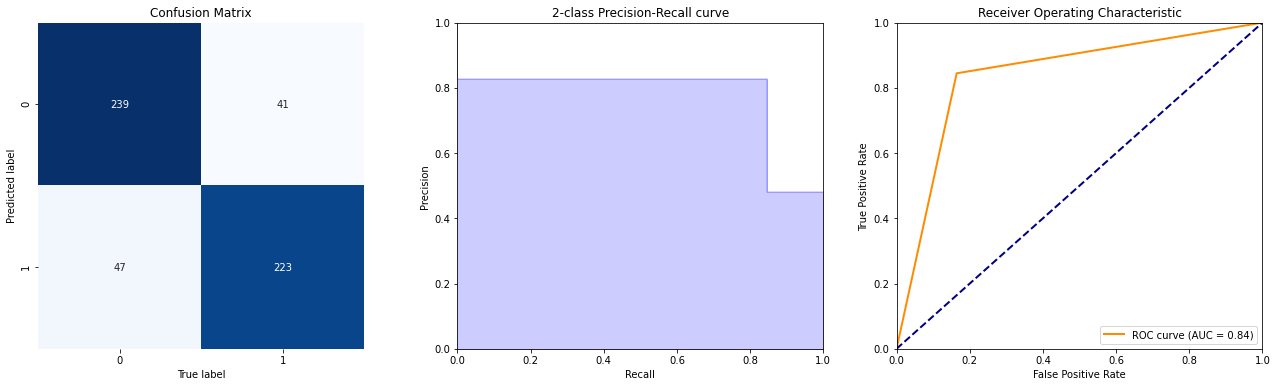

In [48]:
result_0 = show_summary_report(y_test, predictions0)

## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [36]:
print(X_train.shape)

(2198,)


Accuracy: 0.8436
Accuracy : 0.8436 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8248 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8561 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8441                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


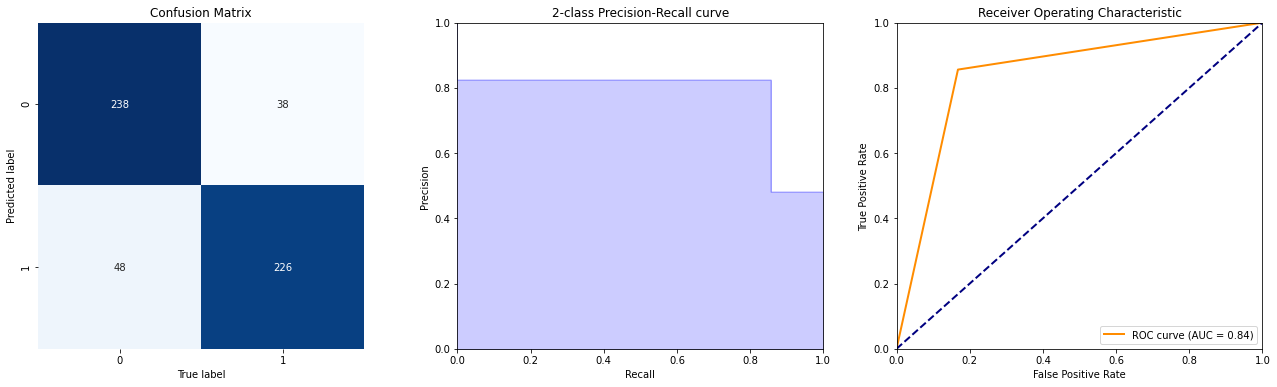

(0.8436363636363636, 0.8248175182481752, 0.8560606060606061, 0.8441142191142191)


In [35]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B.toarray())

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

result_tfidf = show_summary_report(y_test, predictions)
print(result_tfidf)

## Repeating it all for comparision
Repeating the whole lot in one big block

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.

Accuracy : 0.8400 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8259 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8447 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8402                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


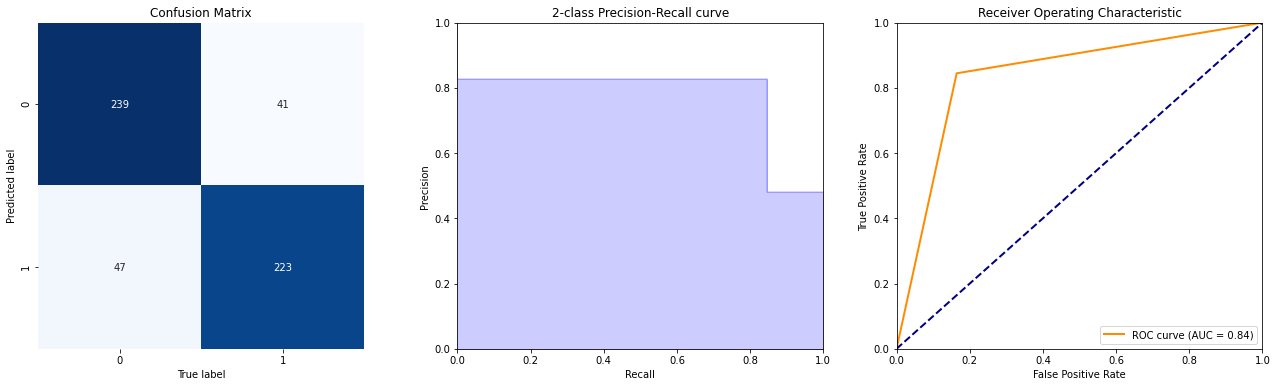

Accuracy : 0.8400 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8259 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8447 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8402                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


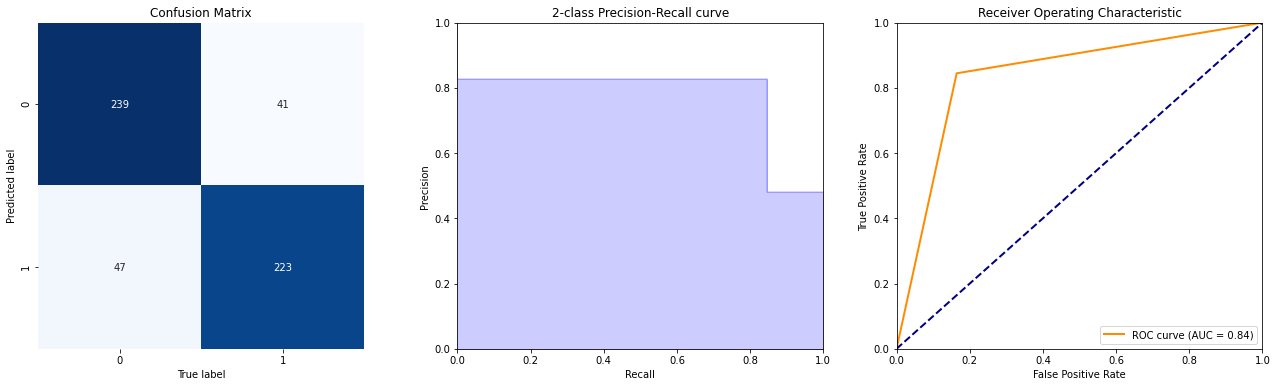

(0.84, 0.825925925925926, 0.8446969696969697, 0.8401806526806527)

In [56]:
# ANSWER

show_summary_report(y_test, predictions)
show_summary_report(y_test, predictions0)




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



